In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as data
import yfinance as yf


In [26]:
start = '2017-01-01'
end = '2023-11-1'

df = yf.download("AAPL", start=start, end=end)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.059309,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.029022,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.166470,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.469339,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.720938,134247600


In [27]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-25,171.880005,173.059998,170.649994,171.100006,171.100006,57157000
2023-10-26,170.369995,171.380005,165.669998,166.889999,166.889999,70625300
2023-10-27,166.910004,168.960007,166.830002,168.220001,168.220001,58499100
2023-10-30,169.020004,171.169998,168.869995,170.289993,170.289993,51131000
2023-10-31,169.350006,170.899994,167.899994,170.770004,170.770004,44846000


In [28]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.059309,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.029022,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.166470,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.469339,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,27.720938,134247600


In [31]:
df = df.drop(["Date","Adj Close"], axis =1)
df.head()

,Open,High,Low,Close,Volume
0,28.950001,29.082500,28.690001,29.037500,115127600
1,28.962500,29.127501,28.937500,29.004999,84472400
2,28.980000,29.215000,28.952499,29.152500,88774400
3,29.195000,29.540001,29.117500,29.477501,127007600
4,29.487499,29.857500,29.485001,29.747499,134247600


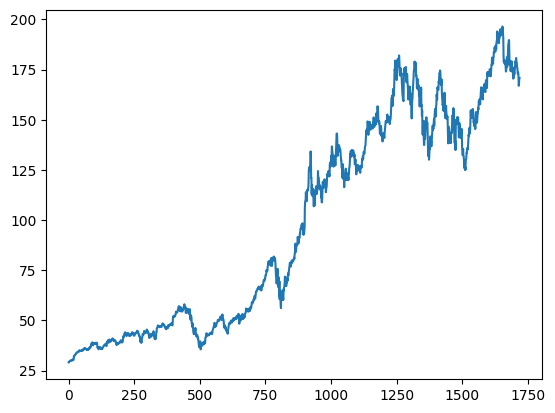

In [33]:
plt.plot(df.Close)

In [34]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1714    182.286601
1715    182.159701
1716    182.049801
1717    181.974501
1718    181.876501
Name: Close, Length: 1719, dtype: float64

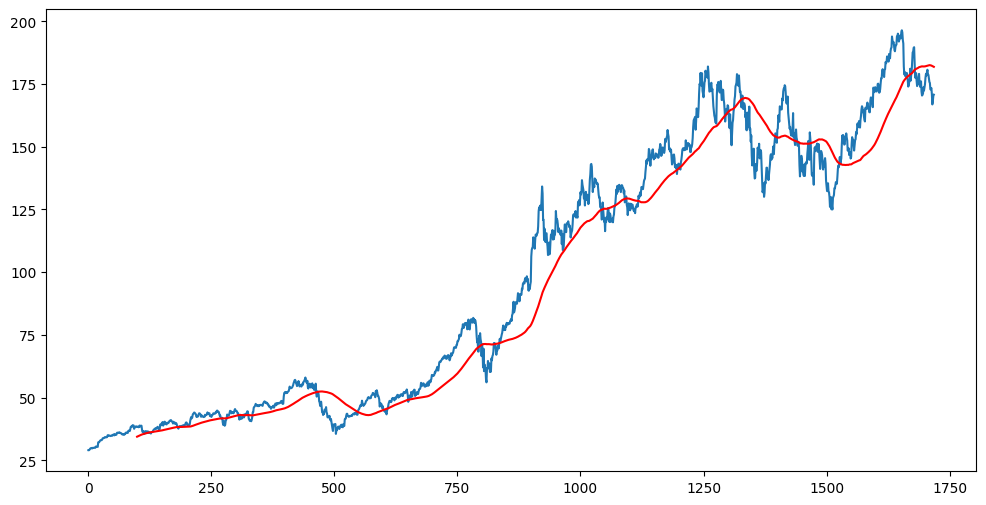

In [35]:
plt.figure(figsize =(12 ,6))
plt.plot(df.Close)
plt.plot(ma100,"r")

In [36]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1714    170.17610
1715    170.35690
1716    170.53055
1717    170.71495
1718    170.89500
Name: Close, Length: 1719, dtype: float64

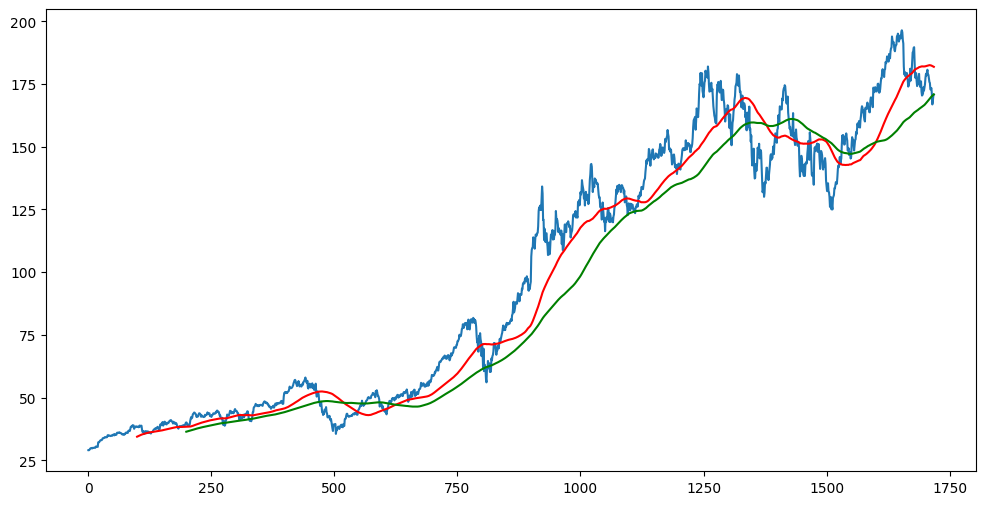

In [37]:
plt.figure(figsize =(12 ,6))
plt.plot(df.Close)
plt.plot(ma100,"r")
plt.plot(ma200,"g")

In [39]:
df.shape

(1719, 5)

In [41]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0: int(len(df)*0.78)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])



print(data_training.shape)

print(data_testing.shape)

(1340, 1)
(516, 1)


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
data_training_array= scaler.fit_transform(data_training)
data_training_array

array([[2.12419344e-04],
       [0.00000000e+00],
       [9.64027295e-04],
       ...,
       [8.35234194e-01],
       [8.33731003e-01],
       [8.79938592e-01]])

In [48]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train , y_train =np.array(x_train) , np.array(y_train)

In [50]:
from keras. layers import Dense, Dropout ,LSTM

from keras.models import Sequential

In [56]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout (0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout (0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout (0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout (0.5))

model.add(Dense(units=1))

In [57]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [60]:
model.compile(optimizer='adam', loss ='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
39/39 [==============================] - 17s 304ms/step - loss: 0.0530
Epoch 2/50
39/39 [==============================] - 12s 307ms/step - loss: 0.0114
Epoch 3/50
39/39 [==============================] - 13s 344ms/step - loss: 0.0084
Epoch 4/50
39/39 [==============================] - 12s 308ms/step - loss: 0.0075
Epoch 5/50
39/39 [==============================] - 12s 310ms/step - loss: 0.0072
Epoch 6/50
39/39 [==============================] - 12s 308ms/step - loss: 0.0061
Epoch 7/50
39/39 [==============================] - 13s 346ms/step - loss: 0.0079
Epoch 8/50
39/39 [==============================] - 12s 309ms/step - loss: 0.0067
Epoch 9/50
39/39 [==============================] - 12s 308ms/step - loss: 0.0064
Epoch 10/50
39/39 [==============================] - 11s 294ms/step - loss: 0.0059
Epoch 11/50
39/39 [==============================] - 11s 280ms/step - loss: 0.0069
Epoch 12/50
39/39 [==============================] - 12s 301ms/step - loss: 0.0058
Epoch 13/50
3

In [61]:
model.save("keras model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [64]:
past_100_days = data_training.tail (100)

final_df = past_100_days.append(data_testing, ignore_index=True)
final_df.head()

<ipython-input-64-317ebf7b2fd2>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


,Close
0,165.320007
1,171.179993
2,175.080002
3,174.559998
4,179.449997


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

In [68]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test , y_test =np.array(x_test) , np.array(y_test)

In [69]:
#predication making
y_predication = model.predict(x_test)

17/17 [==============================] - 2s 84ms/step


In [70]:
scaler.scale_

array([0.01399972])

In [71]:
scaling_factor = 1/0.01399972
y_test = y_test*scaling_factor
y_predication=y_predication*scaling_factor

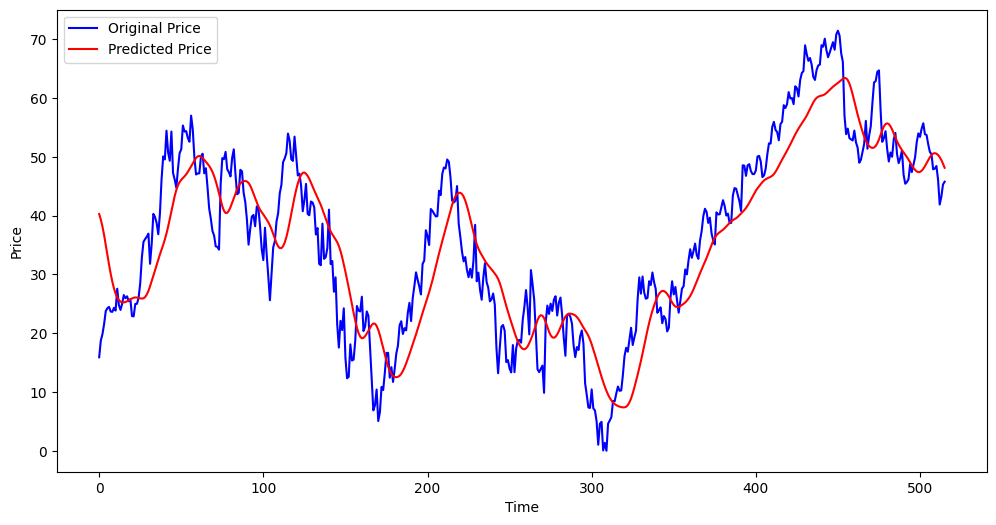

In [76]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predication,'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()